In [2]:
using Plots

# Exercise 1.1b

Verify the derivative of $f(x)$ by implementing the difference quotient.

The given function is:
\begin{equation}
f(x) = \mathrm{ln}(3x^3 + 2)\cdot x + 2 x^5 + 5 e^{-x^2} + \mathrm{sin}(2x)
\end{equation}

In [3]:
f(x) = log(3 * x^3 + 2) * x + 2 * x ^ 5 + 5 * exp(-x^2) + sin(2 * x)

f (generic function with 1 method)

In [34]:
# ===============================================
# Implement the analytical derivative of f(x)
df(x) = 10 * x^4 + (9 * x^3)/(3*x^3 + 2) - 10*x * exp(-x^2) + log(3 * x^3 + 2)+ 2* cos(2*x)
# ===============================================

df (generic function with 1 method)

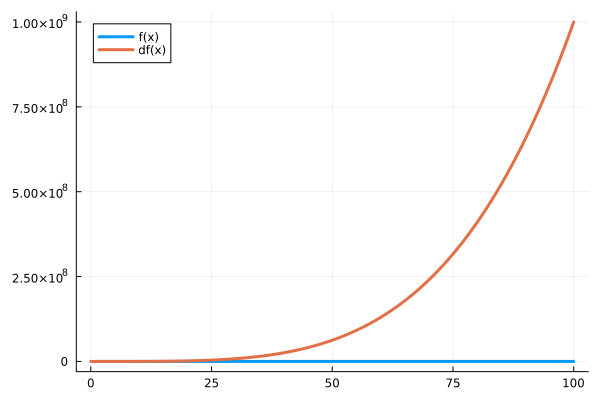

In [35]:
# Define a range of values for which the function should be evaluated
X = 0:100

# Evaluate the function for each point and write it to an array
fX = [f(x) for x in X]
dfX = [df(x) for x in X]

# Plot the values
plot(X, [fX, dfX], linewidth=3, label=["f(x)" "df(x)"])

The difference quotient of a function at the point $x$ is an approximation for the functions derivative $df/dx$:
\begin{equation}
\frac{df}{dx}(x) \approx \frac{f(x+h)-f(x)}{h},
\end{equation}
for $h\rightarrow 0$. See lecture 1, slide 16.

In [36]:
function df_approx(f,x,h)
    # ===============================================
    # Return the difference quotient
    return (f(x + h) - f(x))/h
    # ===============================================
end

df_approx (generic function with 1 method)

In [37]:
# some arbitrary value at which the derivative of the function should be tested
# try others as well!
x0 = 10

# some small value
h = 0.00000001;

In [38]:
# Test your result
@assert abs(df_approx(f,x0,h) - df(x0)) < 0.1

LoadError: AssertionError: abs(df_approx(f, x0, h) - df(x0)) < 0.1

# Exercise 1.2c

 Let $g$ be a function depending on the variables $x_1$ and $x_2$:
\begin{equation}
g(x_1,x_2) =  6 x_1^3 + \mathrm{sin}(2x_2)
\end{equation}

In [9]:
g(x1,x2) = 6*x1^3 + sin(2*x2)

g (generic function with 1 method)

In [10]:
# The gradient of g(x)
dg(x1,x2) = [18*x1^2;
            2*cos(2*x2)]

dg (generic function with 1 method)

In [11]:
# The hessian of g(x)
H(x1,x2) = [36*x1  0;
            0  -4*sin(2x2)]

H (generic function with 1 method)

In [12]:
# test the derivative dg/dx1
# fix the value for x2 -> has no influence on the test
x_fix = 4
g_test(x) = g(x,x_fix)
@assert abs(df_approx(g_test,x0,h) - dg(x0,x_fix)[1])<0.1

In [13]:
# test the derivative dg/dx2
# fix the value for x1 -> has no influence on the test
x_fix = 10
g_test(x) = g(x_fix,x)
@assert abs(df_approx(g_test,x0,h) - dg(x_fix,x0)[2])<0.1

In [14]:
# Test the implementation of the Hessian: entry at row 1, column 1
# fix the value for x2 -> has no influence on the test
x_fix = 5
H_test(x) = H(x,x_fix)
dg_test(x) = dg(x,x_fix)[1]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[1,1])<0.1

In [15]:
# Test the implementation of the Hessian: entry at row 1, column 2
# fix the value for x1 -> has no influence on the test
x_fix = 5
H_test(x) = H(x_fix,x)
dg_test(x) = dg(x_fix,x)[1]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[1,2])<0.1

In [16]:
# Test the implementation of the Hessian: entry at row 2, column 1
# fix the value for x2 -> has no influence on the test
x_fix = 5
H_test(x) = H(x,x_fix)
dg_test(x) = dg(x,x_fix)[2]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[2,1])<0.1

In [17]:
# Test the implementation of the Hessian: entry at row 2, column 2
# fix the value for x1 -> has no influence on the test
x_fix = 5
H_test(x) = H(x_fix,x)
dg_test(x) = dg(x_fix,x)[2]
@assert abs(df_approx(dg_test,x0,h) - H_test(x0)[2,2])<0.1

# Exercise 1.3

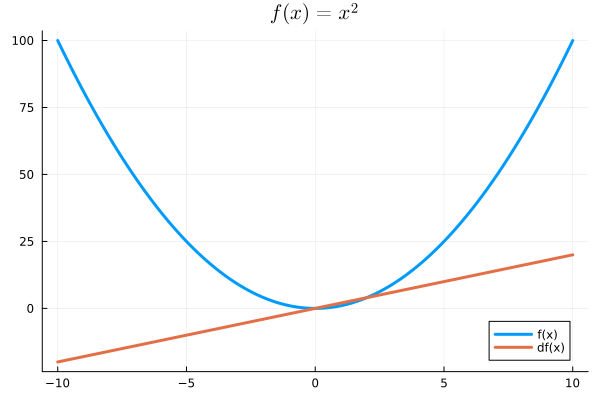

In [18]:
f(x) = x^2
df(x) = 2x

X = X = LinRange(-10, 10, 1000)
fX = [f(x) for x in X]
dfX = [df(x) for x in X]
plot(X, [fX, dfX], linewidth=3, label=["f(x)" "df(x)"], title=raw"$f(x) = x^2$")

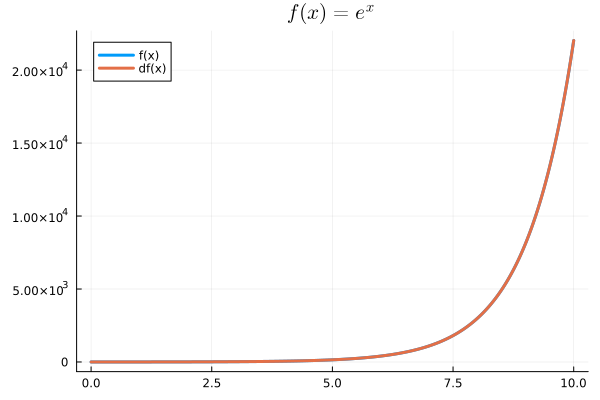

In [19]:
a = 1
f(x) = exp(a*x)
df(x) = a*exp(a*x)

X = LinRange(0, 10, 1000)
fX = [f(x) for x in X]
dfX = [df(x) for x in X]
plot(X, [fX, dfX], linewidth=3, label=["f(x)" "df(x)"], title=raw"$f(x) = e^{x}$")

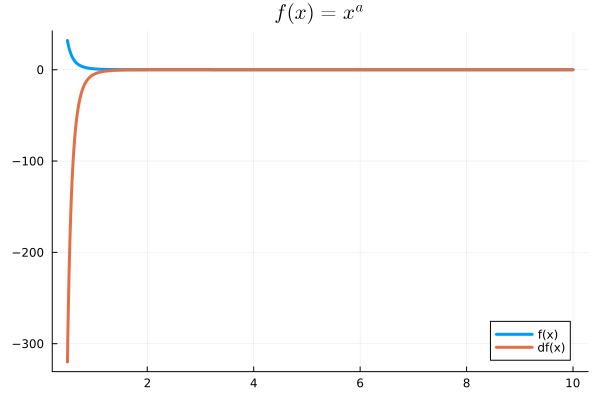

In [20]:
a = -5
f(x) = x^a
df(x) = a*x^(a-1)


X = LinRange(0.5, 10, 1000)
fX = [f(x) for x in X]
dfX = [df(x) for x in X]
plot(X, [fX, dfX], linewidth=3, label=["f(x)" "df(x)"], title=raw"$f(x) = x^a$")

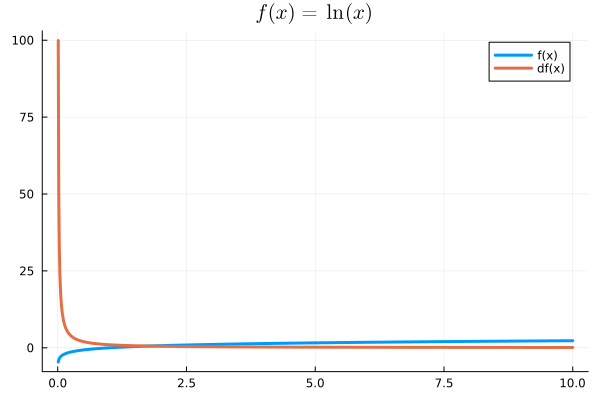

In [21]:
f(x) = log(x)
df(x) = 1/x

X = LinRange(0, 10, 1000)
fX = [f(x) for x in X]
dfX = [df(x) for x in X]
plot(X, [fX, dfX], linewidth=3, label=["f(x)" "df(x)"], title=raw"$f(x) = \ln(x)$")

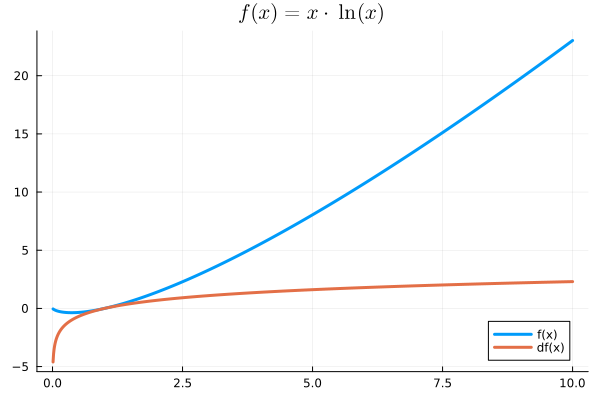

In [22]:
f(x) = x * log(x)
df(x) = log(x)

X = LinRange(0, 10, 1000)
fX = [f(x) for x in X]
dfX = [df(x) for x in X]
plot(X, [fX, dfX], linewidth=3, label=["f(x)" "df(x)"], title=raw"$f(x) = x\cdot\ln(x)$")

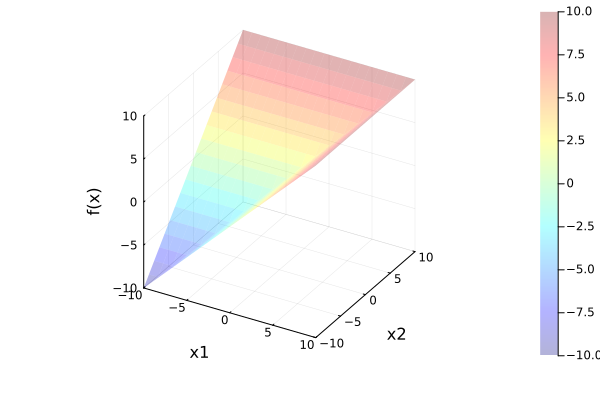

In [23]:
gr()  # Activate the GR backend for GUI

# Define the function
f(x1, x2) = max(x1, x2)

# Generate the test data
test_x1 = range(-10, 10, length=20)
test_x2 = range(-10, 10, length=20)

# Calculate the z values
zs = [f(x1, x2) for x1 in test_x1, x2 in test_x2]

# Create the 3D plot
plot(test_x1, test_x2, zs, st=:surface, c=:jet, alpha=0.3)

# Add axis labels
xlabel!("x1")
ylabel!("x2")
zlabel!("f(x)")

# Display the plot in a GUI window
# gui()  # Open the plot in a separate window